In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.2f}'.format
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (MinMaxScaler,PolynomialFeatures)
from scipy import stats
from scipy.stats import norm, skew
import seaborn as sns
import warnings 
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

In [2]:
train = pd.read_csv(r'C:\Users\Fakhry Firdausi\Downloads\Coding Stuffs\Python\IBM Machine Learning\2. Supervised Learning - Regression\Week 3\Datasets\house-prices-advanced-regression-techniques\train.csv')
test = pd.read_csv(r'C:\Users\Fakhry Firdausi\Downloads\Coding Stuffs\Python\IBM Machine Learning\2. Supervised Learning - Regression\Week 3\Datasets\house-prices-advanced-regression-techniques\test.csv')


## 1. Exploratory Data Analysis

### 1.1. Train Dataset

In [3]:
# Checking data shape
train.shape

(1460, 81)

In [4]:
# Checking data info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# Checking Data types
train_d = train.dtypes
train_d.value_counts()

object     43
int64      35
float64     3
dtype: int64

In [6]:
# Checking missing values
train.isnull().sum().sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
Id                 0
dtype: int64

### 1.2. Test Dataset

In [7]:
# Checing data shape
test.shape

(1459, 80)

In [8]:
# Checking data info
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [9]:
# Checking data types
test_d = test.dtypes
test_d.value_counts()

object     43
int64      26
float64    11
dtype: int64

In [10]:
# Checking missing values
test.isnull().sum().sort_values(ascending=False).head(33)

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageYrBlt       78
GarageQual        78
GarageFinish      78
GarageCond        78
GarageType        76
BsmtCond          45
BsmtQual          44
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
BsmtHalfBath       2
Utilities          2
Functional         2
BsmtFullBath       2
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
KitchenQual        1
TotalBsmtSF        1
Exterior2nd        1
GarageCars         1
Exterior1st        1
GarageArea         1
SaleType           1
dtype: int64

### 1.3. Train and test datasets comparison

### 1.3.1 Datatypes

In [11]:
train_d = train_d[:-1]
test_d = test.dtypes

In [12]:
train_d.compare(test_d)

,self,other
BsmtFinSF1,int64,float64
BsmtFinSF2,int64,float64
BsmtUnfSF,int64,float64
TotalBsmtSF,int64,float64
BsmtFullBath,int64,float64
BsmtHalfBath,int64,float64
GarageCars,int64,float64
GarageArea,int64,float64


_Inconsistent data types, but it is not really a problem_

### 1.3.2 Missing Values

In [13]:
miss_train = train.isnull().sum()[:-1]
miss_null = test.isnull().sum()

In [14]:
miss_train.compare(miss_null).sort_values(['self'],ascending=False)

,self,other
PoolQC,1453.00,1456.00
MiscFeature,1406.00,1408.00
Alley,1369.00,1352.00
Fence,1179.00,1169.00
FireplaceQu,690.00,730.00
LotFrontage,259.00,227.00
GarageType,81.00,76.00
GarageCond,81.00,78.00
GarageYrBlt,81.00,78.00
GarageFinish,81.00,78.00


The `Alley , Fence, FireplaceQu, LotFrontage` columns have the most number of missing values, we will drop these columns.

### 1.3.3 Distribution

In [15]:
numerical_features = [col for col in train.columns if train[col].dtypes != 'O']
discrete_features = [col for col in numerical_features if len(train[col].unique()) < 25 and col not in ['Id']]
continuous_features = [feature for feature in numerical_features if feature not in discrete_features+['Id']]
categorical_features = [col for col in train.columns if train[col].dtype == 'O']

In [16]:
print('Total number of numerical columns: ',len(numerical_features),'\n')
print('Total number of discrete columns: ',len(discrete_features),'\n')
print('Total number of continuous features: ',len(continuous_features),'\n')
print('Total number of discrete features: ',len(categorical_features))

Total number of numerical columns:  38 

Total number of discrete columns:  18 

Total number of continuous features:  19 

Total number of discrete features:  43


In [17]:
combined_df = pd.concat([train,test],axis=0)
combined_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.00,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.00,Gd,TA,PConc,Gd,TA,No,GLQ,706.00,Unf,0.00,150.00,856.00,GasA,Ex,Y,SBrkr,856,854,0,1710,1.00,0.00,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.00,RFn,2.00,548.00,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.00
1,2,20,RL,80.00,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.00,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.00,Unf,0.00,284.00,1262.00,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.00,1.00,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.00,RFn,2.00,460.00,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.00
2,3,60,RL,68.00,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.00,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.00,Unf,0.00,434.00,920.00,GasA,Ex,Y,SBrkr,920,866,0,1786,1.00,0.00,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.00,RFn,2.00,608.00,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.00
3,4,70,RL,60.00,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.00,TA,TA,BrkTil,TA,Gd,No,ALQ,216.00,Unf,0.00,540.00,756.00,GasA,Gd,Y,SBrkr,961,756,0,1717,1.00,0.00,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.00,Unf,3.00,642.00,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.00
4,5,60,RL,84.00,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.00,Gd,TA,PConc,Gd,TA,Av,GLQ,655.00,Unf,0.00,490.00,1145.00,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.00,0.00,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.00,RFn,3.00,836.00,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.00,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.00,TA,TA,CBlock,TA,TA,No,Unf,0.00,Unf,0.00,546.00,546.00,GasA,Gd,Y,SBrkr,546,546,0,1092,0.00,0.00,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.00,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.00,TA,TA,CBlock,TA,TA,No,Rec,252.00,Unf,0.00,294.00,546.00,GasA,TA,Y,SBrkr,546,546,0,1092,0.00,0.00,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.00,Unf,1.00,286.00,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.00,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.00,TA,TA,CBlock,TA,TA,No,ALQ,1224.00,Unf,0.00,0.00,1224.00,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.00,0.00,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.00,Unf,2.00,576.00,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,

In [18]:
combined_df["Label"] = "test"
combined_df["Label"][:1460] = "train"

### 1.3.4 Distribution plots comparison

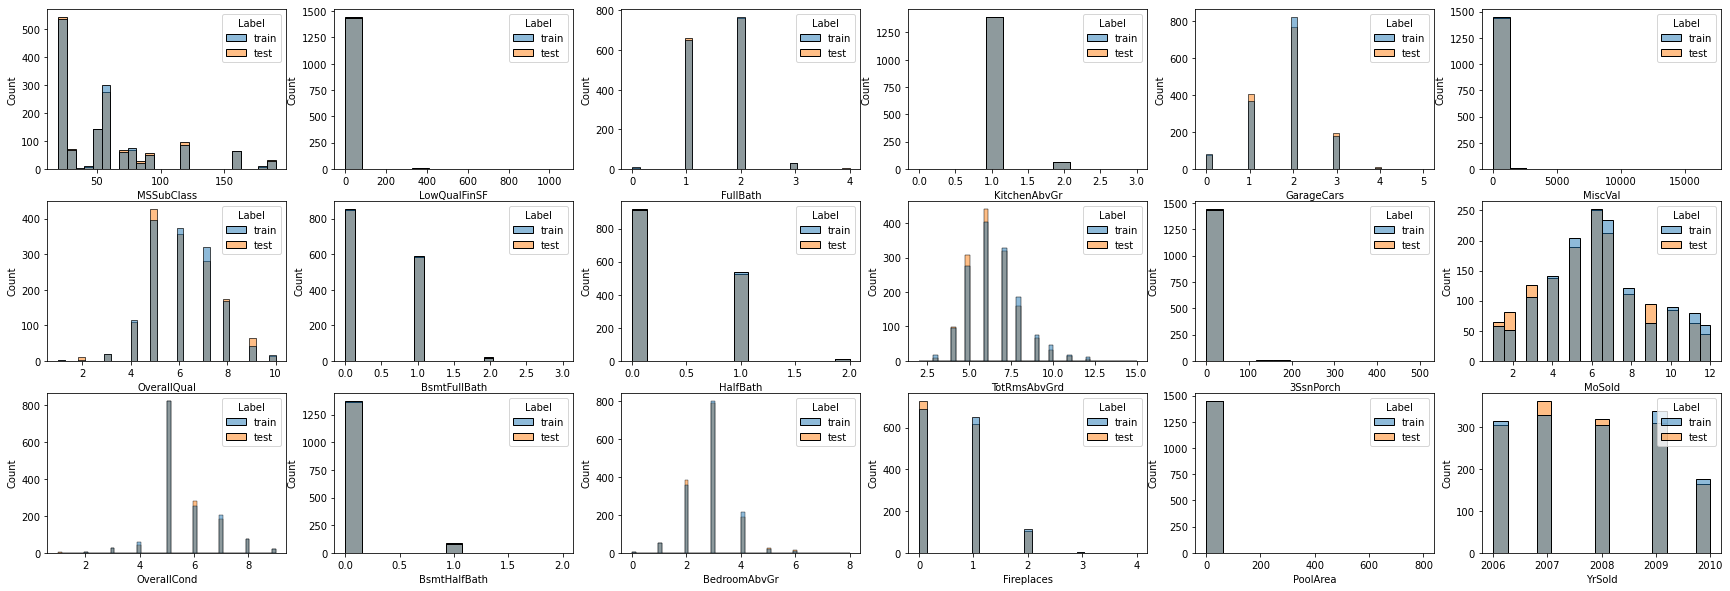

In [19]:
## Discrete Features
f, axes = plt.subplots(3,6 , figsize=(30, 10), sharex=False)
for i, feature in enumerate(discrete_features):
    sns.histplot(data=combined_df, x = feature, hue="Label",ax=axes[i%3, i//3]) 

* Some features can be reclassified as _Categorical_, such as `MSSubClass`.
* Some features are dominated by 0/null `(PoolArea, LowQualFinSF, 3SsnPorch, MiscVal)`, thus we can consider to drop.

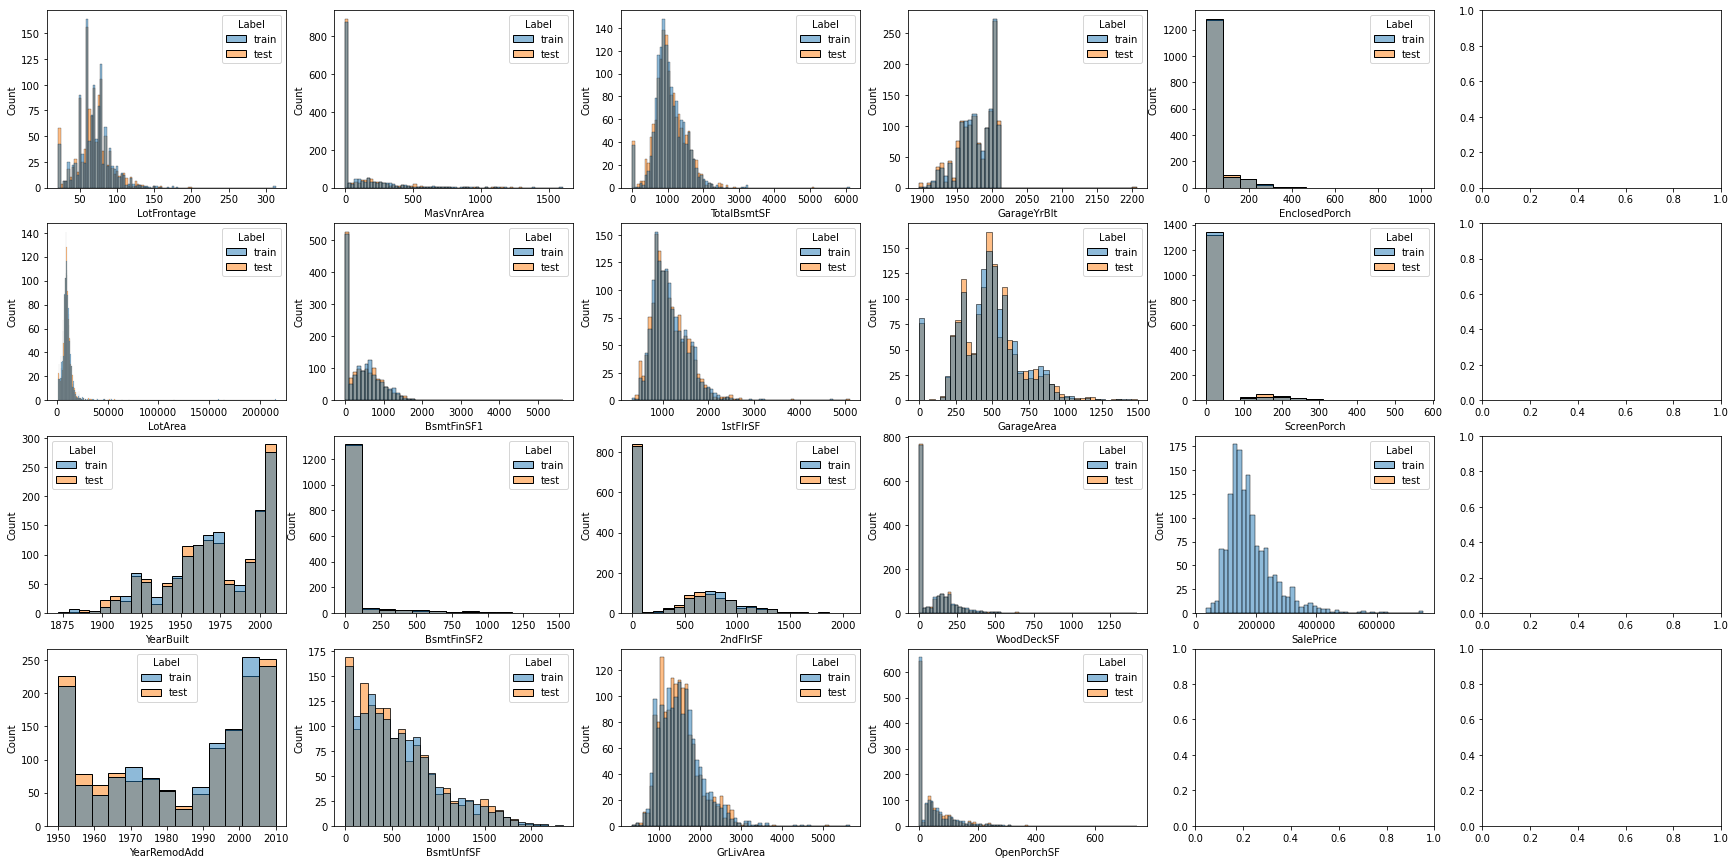

In [20]:
## Continuous Features
f, axes = plt.subplots(4,6 , figsize=(30, 15), sharex=False)
for i, feature in enumerate(continuous_features):
    sns.histplot(data=combined_df, x = feature, hue="Label",ax=axes[i%4, i//4]) 

The distribution of train and test data are mostly similiar

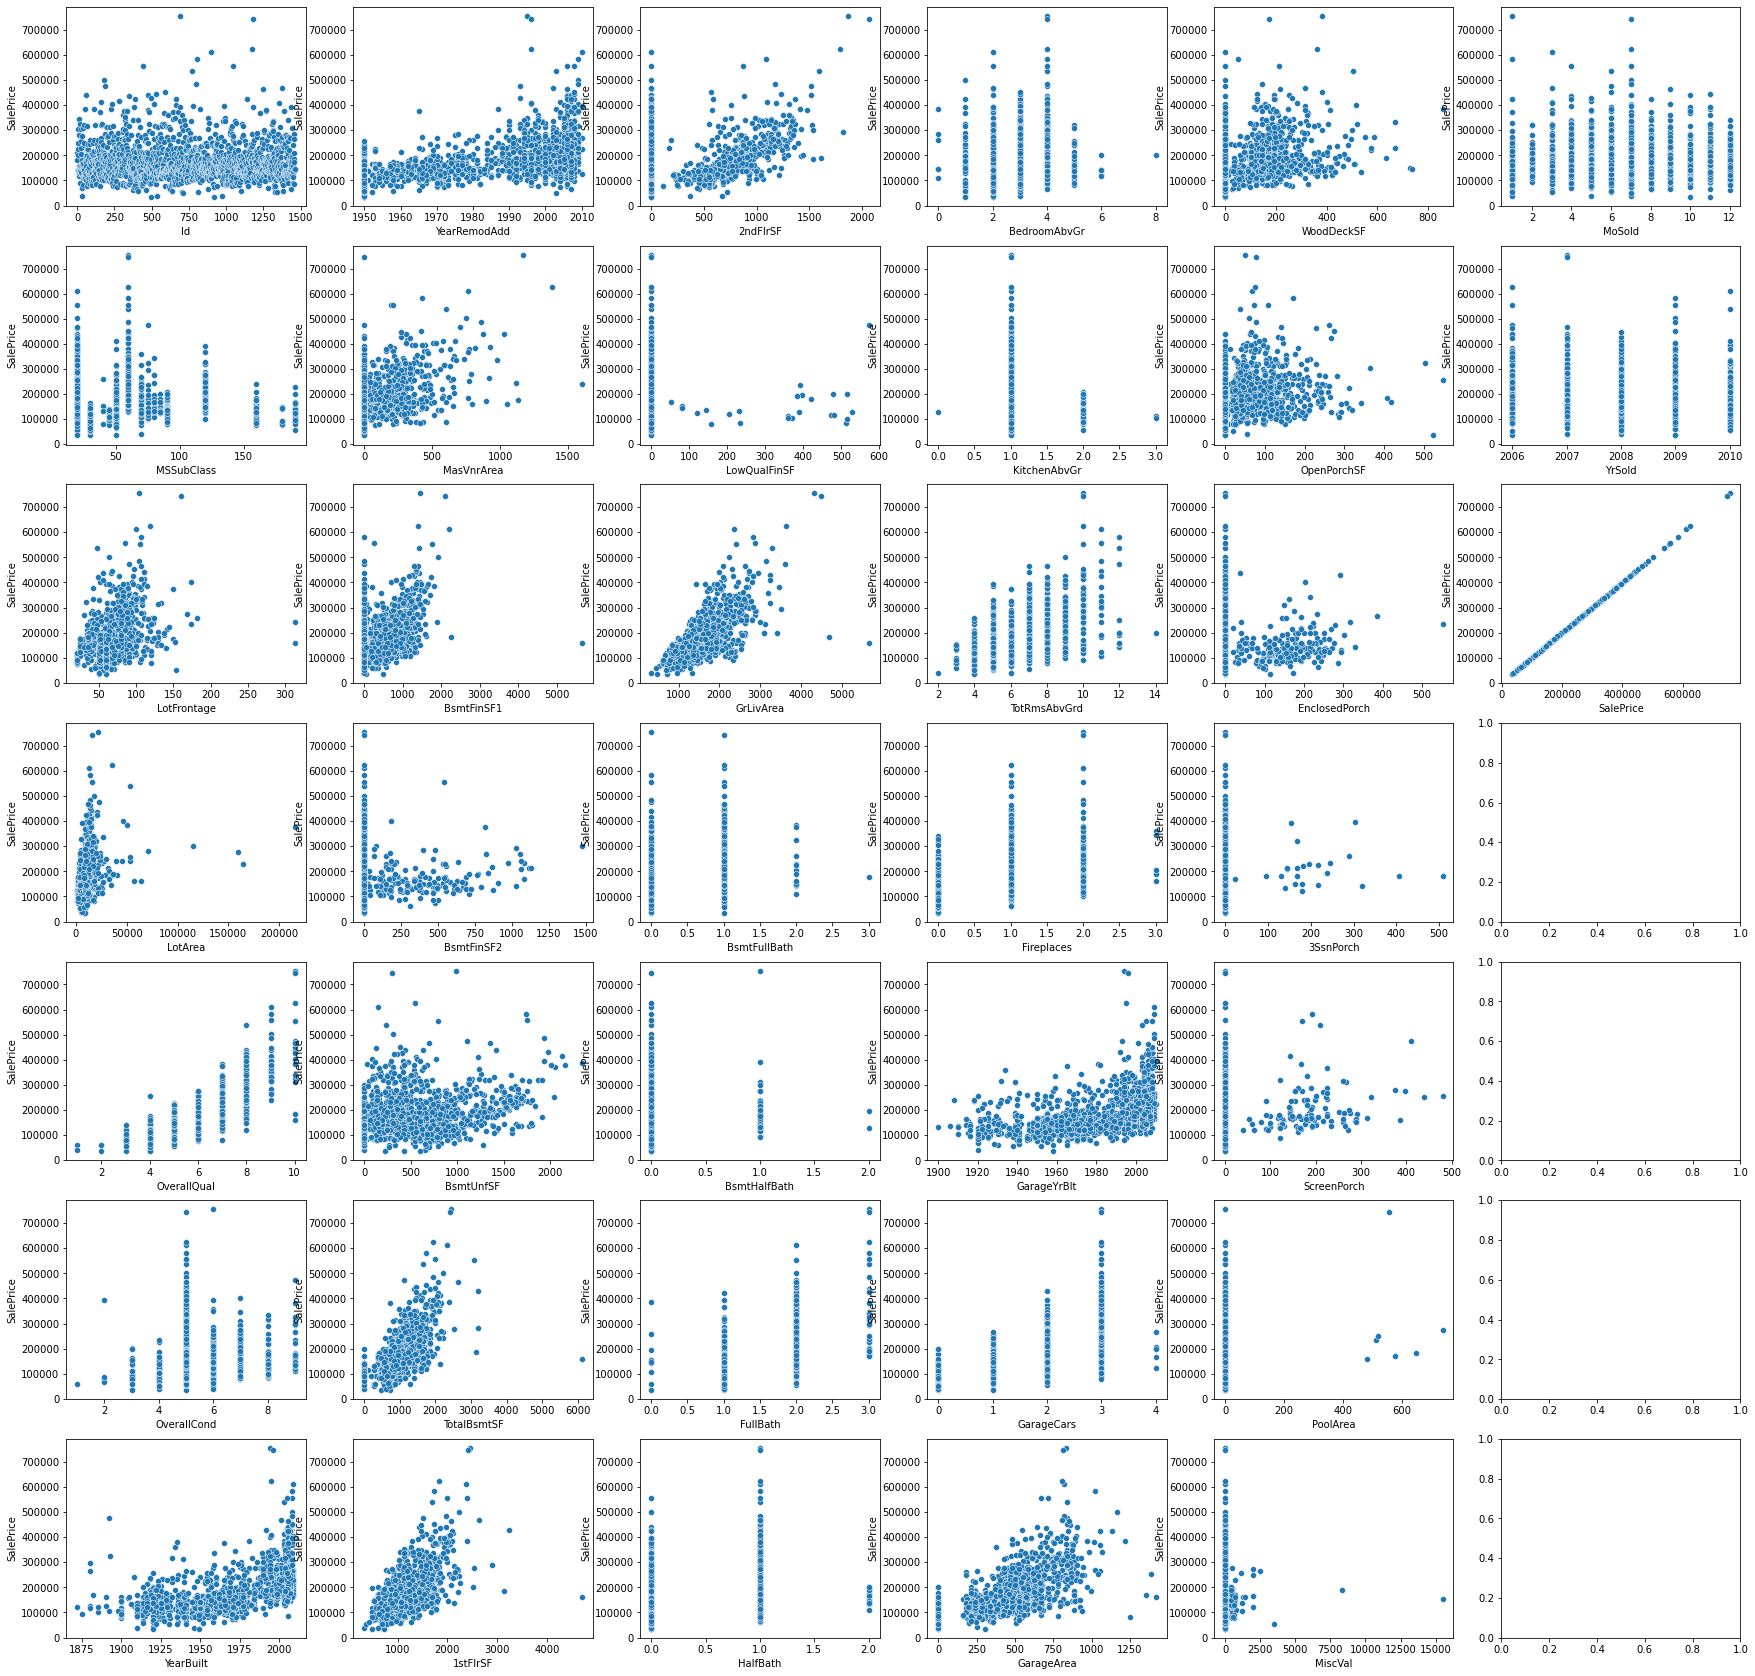

In [21]:
## Linearity Check
f, axes = plt.subplots(7,6 , figsize=(30, 30), sharex=False)
for i, feature in enumerate(numerical_features):
    sns.scatterplot(data=combined_df, x = feature, y= "SalePrice",ax=axes[i%7, i//7])

These features are not linear towards each other
* SalePrice VS. BsmtUnfSF
* SalePrice VS. TotalBsmtSF
* SalePrice VS. GarageArea
* SalePrice VS. LotArea
* SalePrice VS. LotFrontage
* SalePrice VS. GrLivArea
* SalePrice VS.1stFlrSF

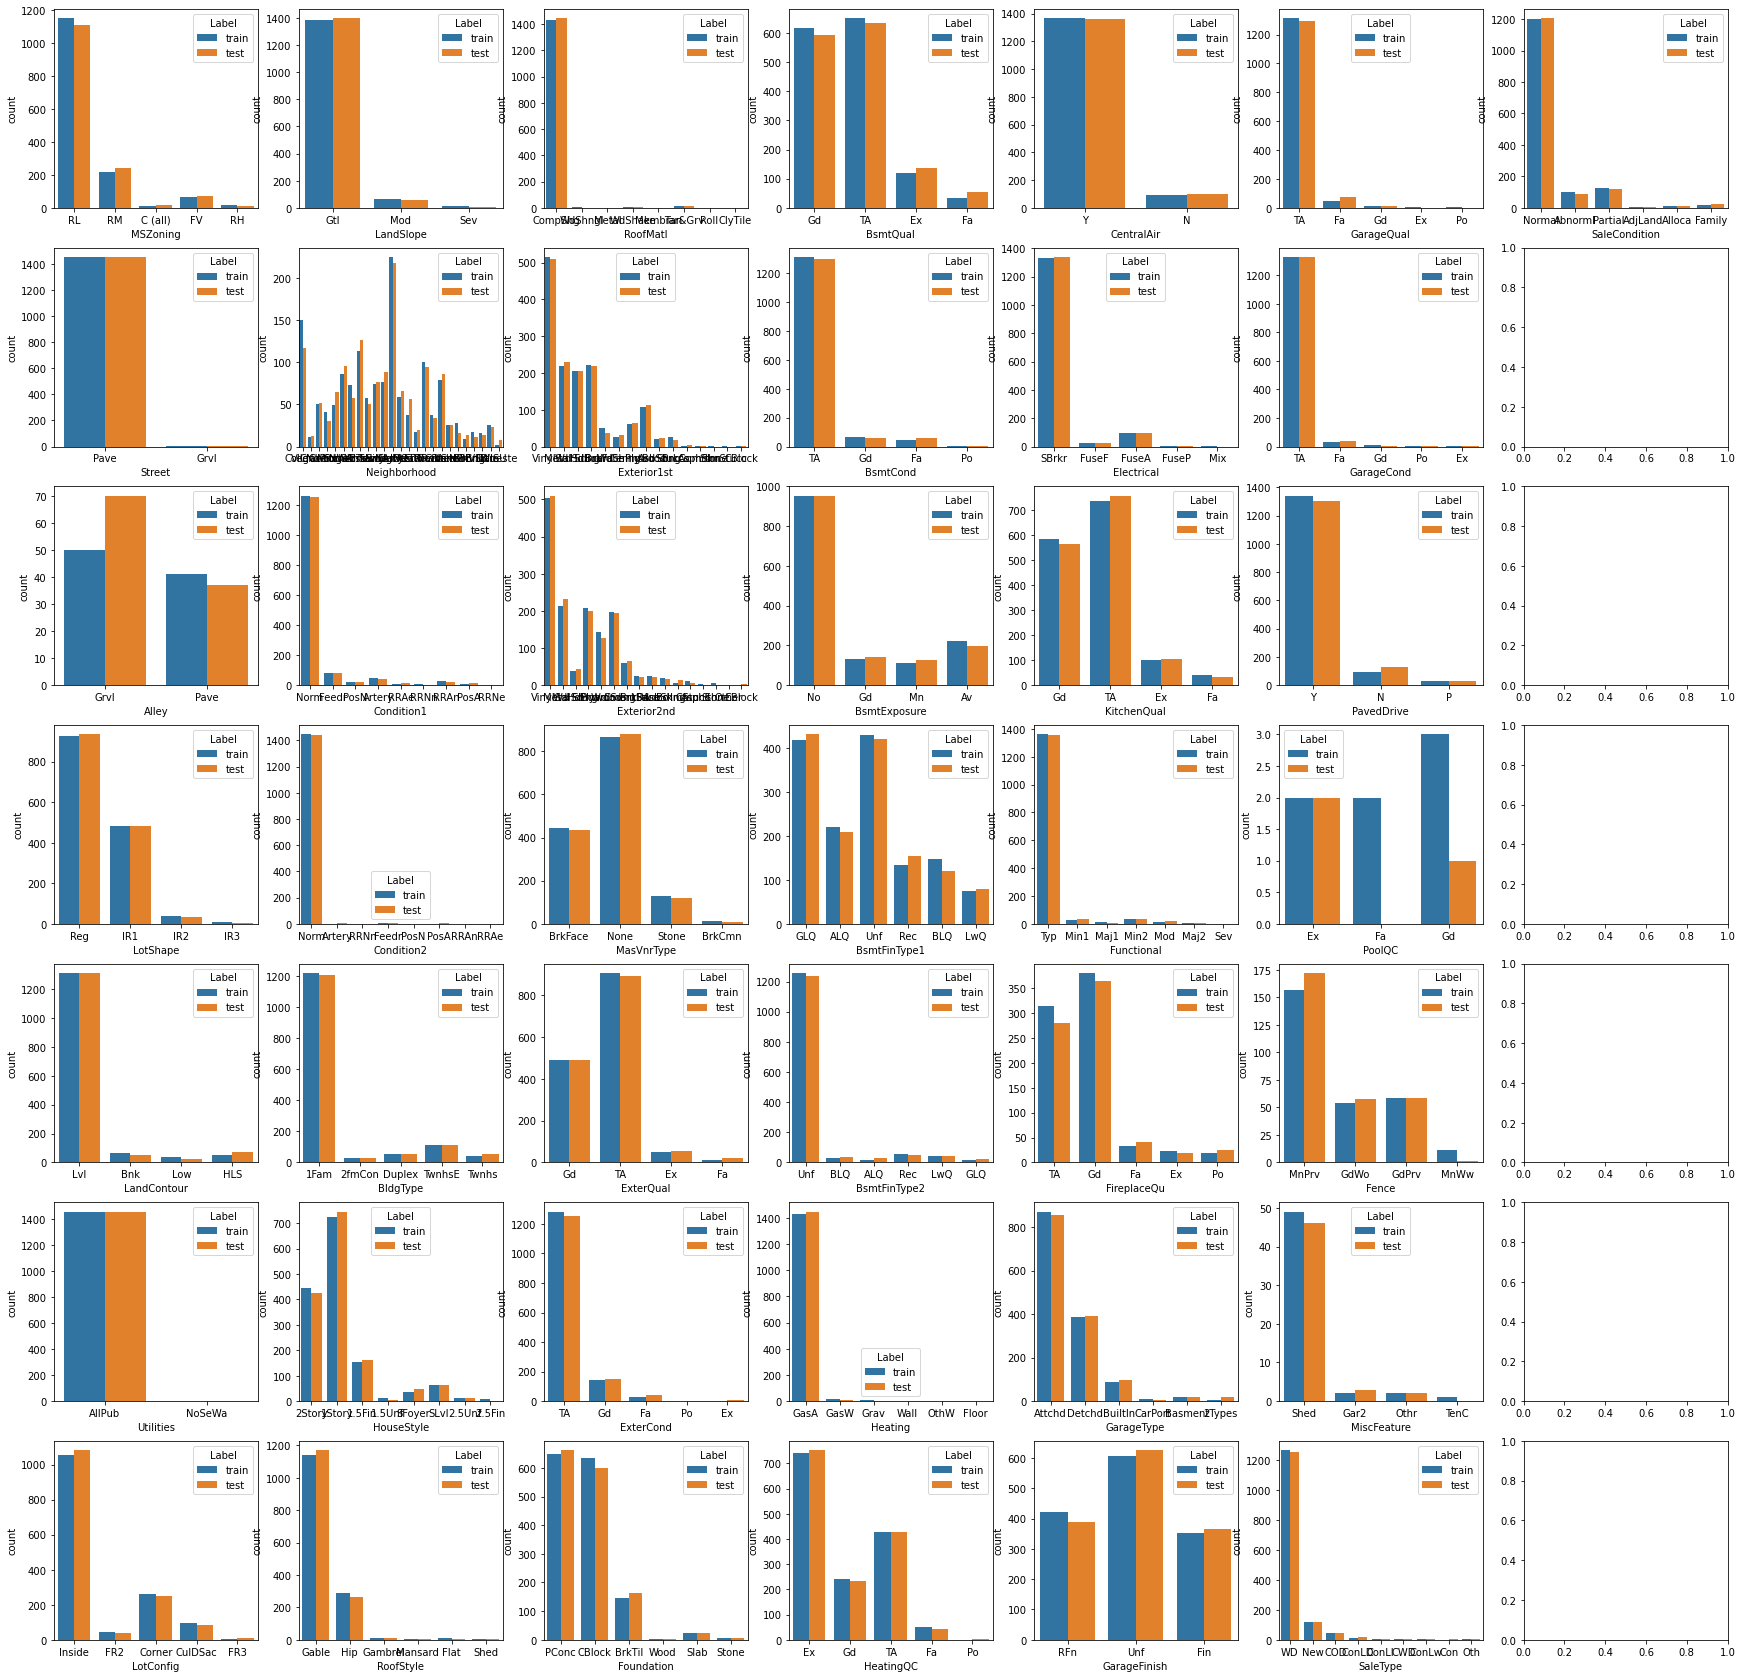

In [22]:
## Categorical Feature
f, axes = plt.subplots(7,7 , figsize=(30, 30), sharex=False)
for i, feature in enumerate(categorical_features):
    sns.countplot(data = combined_df, x = feature, hue="Label",ax=axes[i%7, i//7])

* Both of these datasets have similar distribution for most categorical features.
* Some features have dominant items, we can combine some minor items into a group otherwise we can drop these columns.
* Ex: **'RoofMatl','Street','Condition2','Utilities','Heating'** (These columns should be dropped)
* Ex: **'Fa' & 'Po' in 'HeatingQC', 'FireplaceQu', 'GarageQual' and 'GarageCond'** 


Now let's confirm that the items we want to combine has similar prices(SalePrices value).

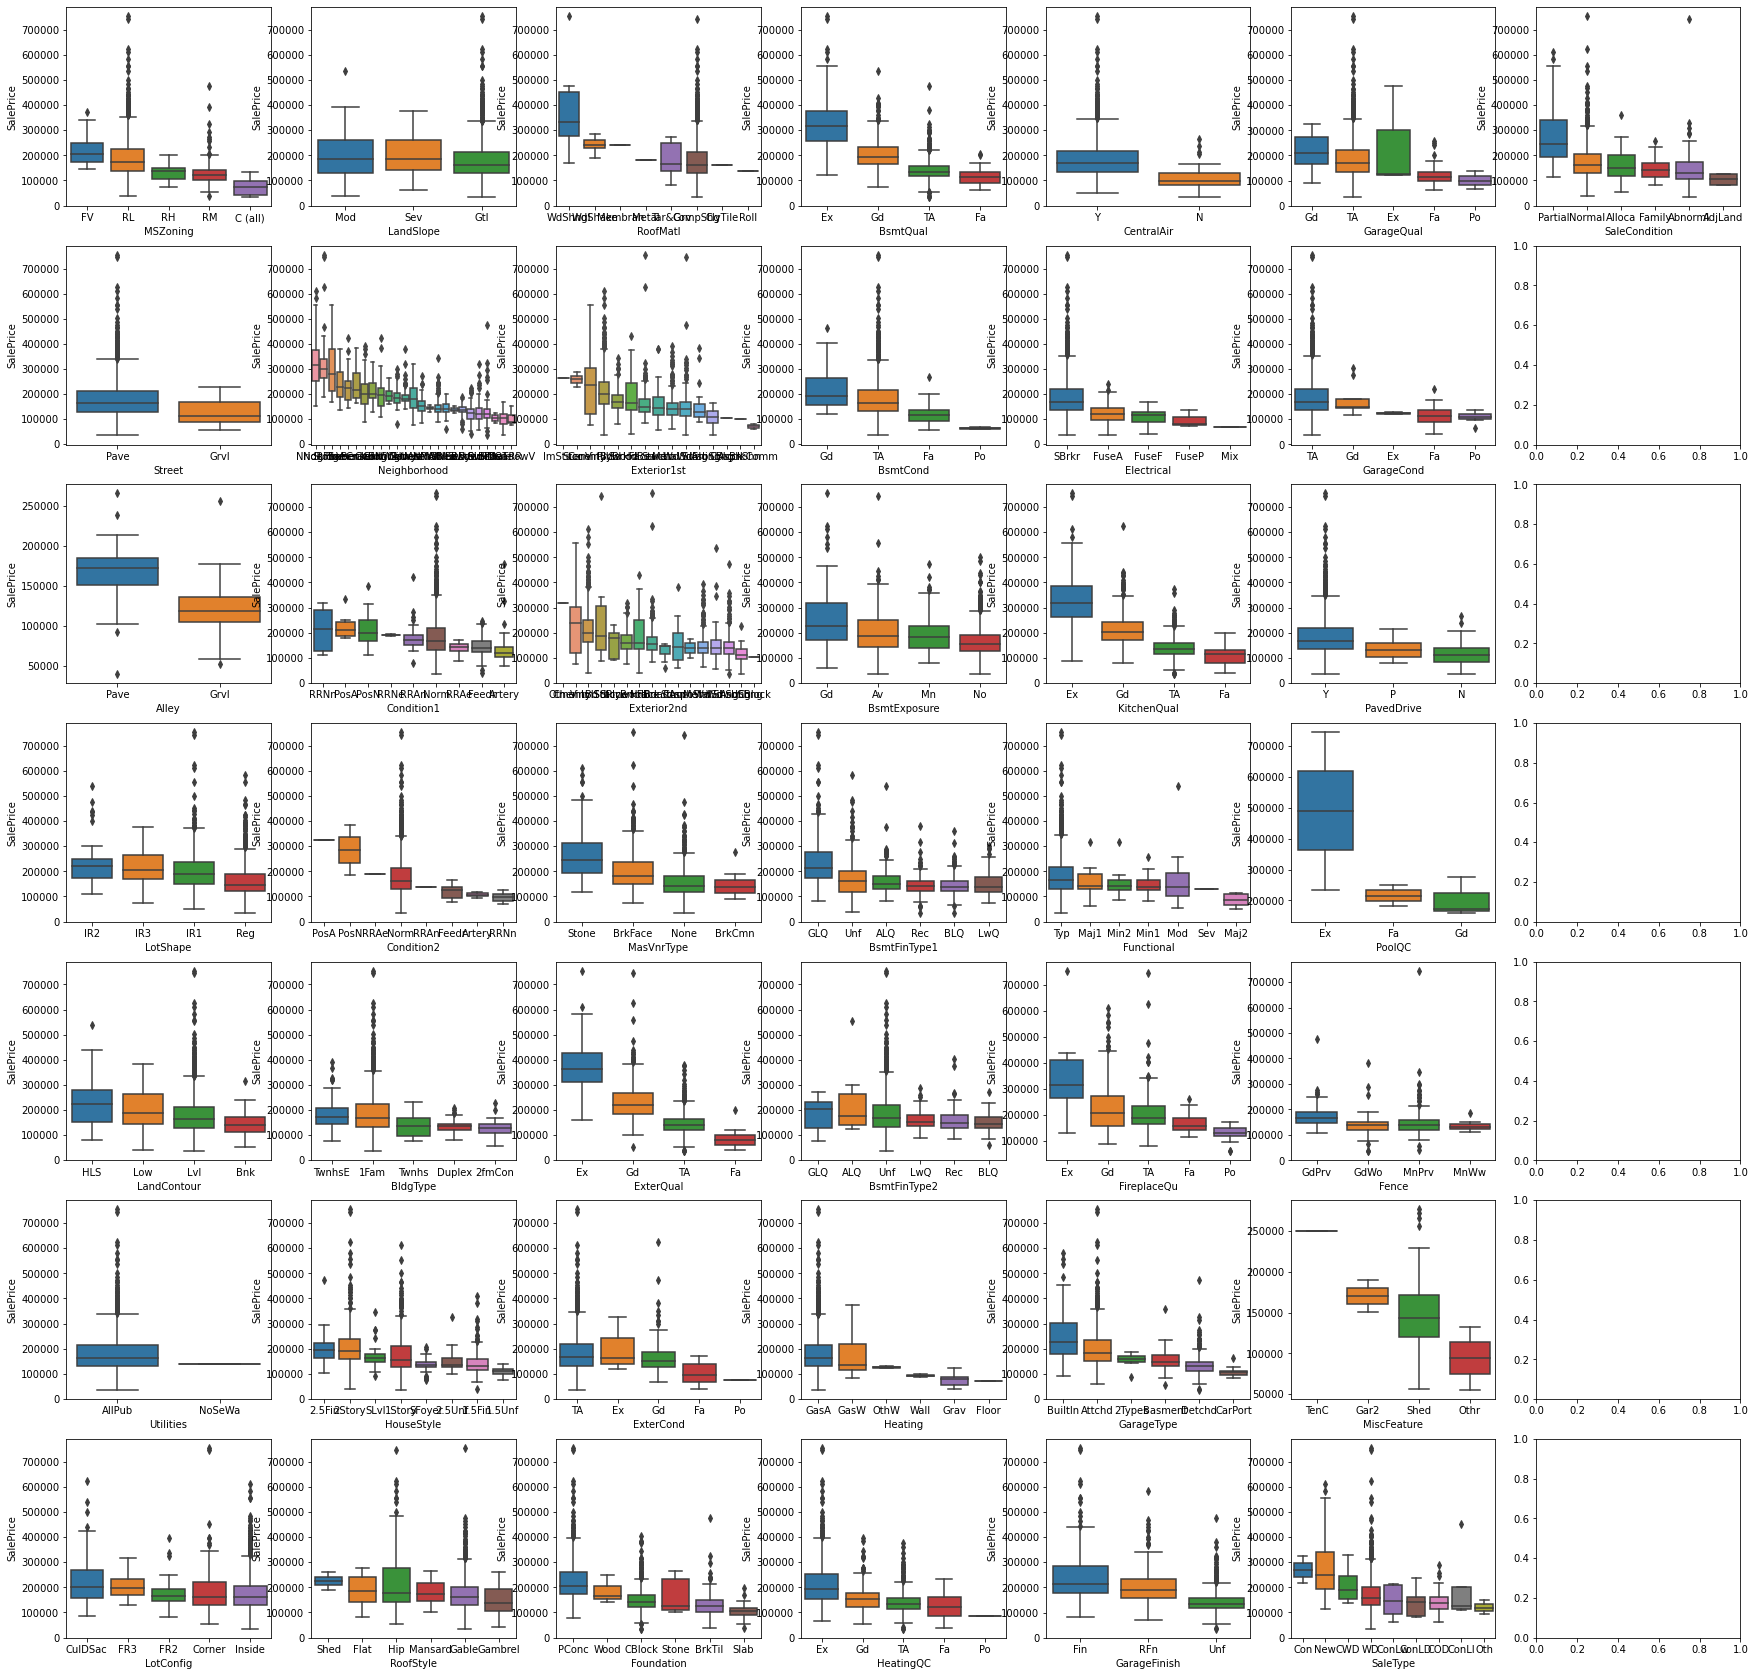

In [23]:
f, axes = plt.subplots(7,7 , figsize=(30, 30), sharex=False)
for i, feature in enumerate(categorical_features):
    sort_list = sorted(combined_df.groupby(feature)['SalePrice'].median().items(), key= lambda x:x[1], reverse = True)
    order_list = [x[0] for x in sort_list ]
    sns.boxplot(data = combined_df, x = feature, y = 'SalePrice', order=order_list, ax=axes[i%7, i//7])
plt.show()

Here, we could see that sale prices for **'Fa' & 'Po' in 'HeatingQC', 'FireplaceQu', 'GarageQual'** and **'GarageCond'** are similar, so we can combine these items.

### 1.4 Filling missing values

In [24]:
# First we have to separate the numerical features that have missing values
null_features_numerical = [col for col in combined_df.columns if combined_df[col].isnull().sum() > 0 and col not in categorical_features]
null_features_numerical

['LotFrontage',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'SalePrice']

Actually we can apply 2 approaches, fill it with median or mean.

But we must try to see each distributions to see which approach that we can take.

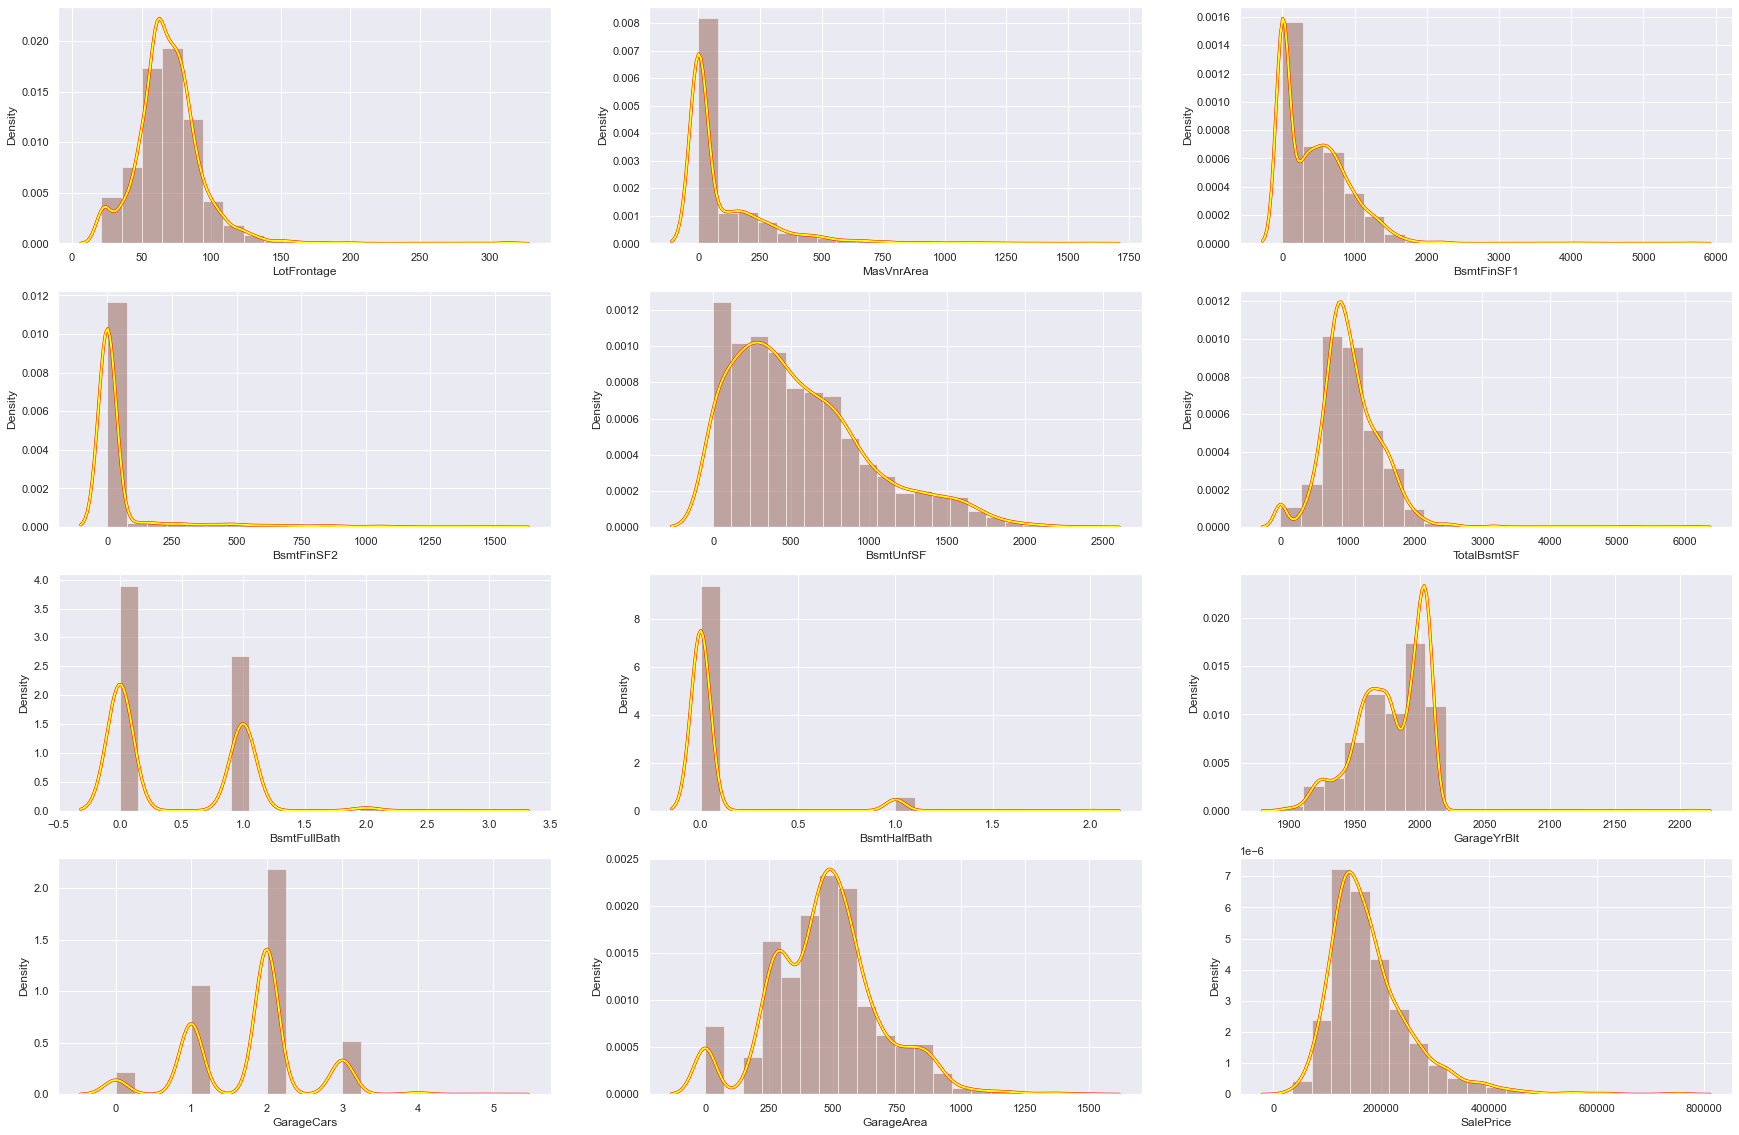

In [25]:
# Median
plt.figure(figsize=(30,20))
sns.set()
warnings.simplefilter("ignore")
for i,var in enumerate(null_features_numerical):
  plt.subplot(4,3,i+1)
  sns.distplot(combined_df[var],bins=20,kde_kws={'linewidth':3,'color':'red'},label="original")
  sns.distplot(combined_df[var],bins=20,kde_kws={'linewidth':2,'color':'yellow'},label="median")

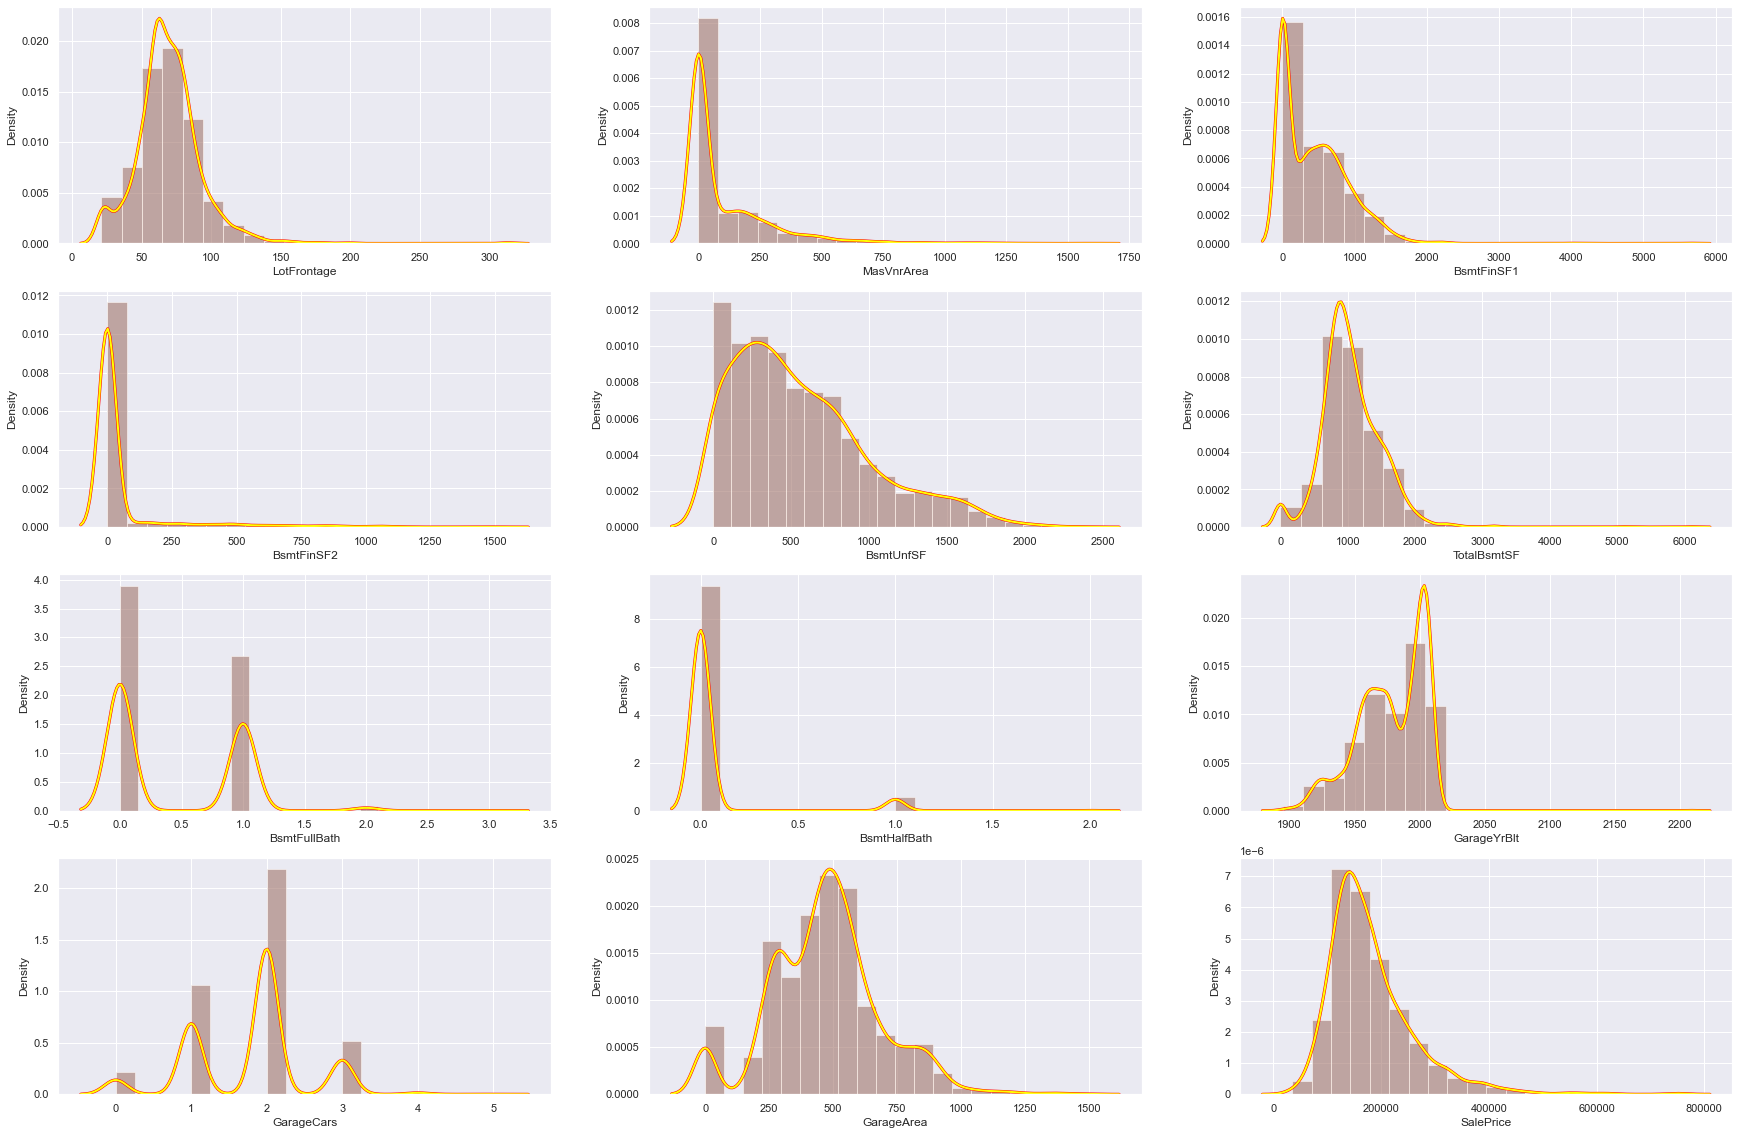

In [26]:
# Mean
plt.figure(figsize=(30,20))
sns.set()

warnings.simplefilter("ignore")
for i,var in enumerate(null_features_numerical):
  plt.subplot(4,3,i+1)
  sns.distplot(combined_df[var],bins=20,kde_kws={'linewidth':3,'color':'red'},label="original")
  sns.distplot(combined_df[var],bins=20,kde_kws={'linewidth':2,'color':'yellow'},label="mean")

In [27]:
def filling_na(df):
    object_list = df.select_dtypes('object').columns
    number_list = df.select_dtypes('number').columns
    number_list = number_list[~number_list.isin(['TARGET'])]
    df[number_list] = df[number_list].fillna(df[number_list].mean())
    df[object_list] = df[object_list].fillna(df[object_list].mode().iloc[0])
    return df

In [28]:
combined_df = filling_na(combined_df)

### 1.5 Checking Temporal Features

In [29]:
year_var = [col for col in combined_df.columns if 'Yr' in col or 'Year' in col]
year_var

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

Text(0.5, 1.0, 'House price vs YearSold')

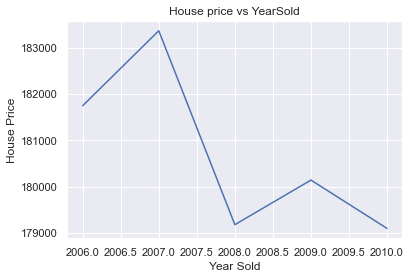

In [30]:
# We will check is there any correlation between "SalePrice" and these year variables
combined_df.groupby('YrSold')['SalePrice'].mean().plot()
plt.xlabel('Year Sold')
plt.ylabel('House Price')
plt.title('House price vs YearSold')

Text(0.5, 1.0, 'House price vs YearRemodAdd')

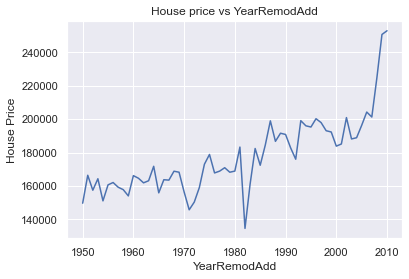

In [31]:
combined_df.groupby('YearRemodAdd')['SalePrice'].mean().plot()
plt.xlabel('YearRemodAdd')
plt.ylabel('House Price')
plt.title('House price vs YearRemodAdd')

Text(0.5, 1.0, 'House price vs GarageYrBlt')

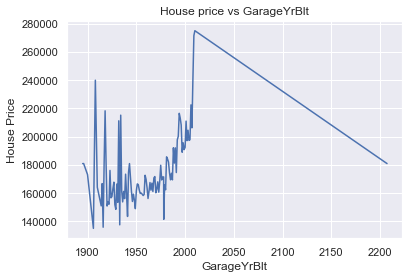

In [32]:
combined_df.groupby('GarageYrBlt')['SalePrice'].mean().plot()
plt.xlabel('GarageYrBlt')
plt.ylabel('House Price')
plt.title('House price vs GarageYrBlt')

Text(0.5, 1.0, 'House price vs YearBuilt')

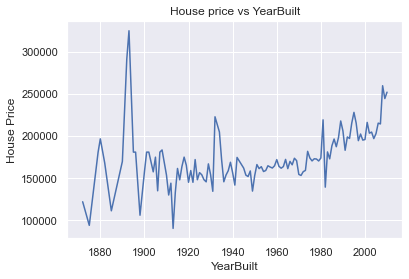

In [33]:
combined_df.groupby('YearBuilt')['SalePrice'].mean().plot()
plt.xlabel('YearBuilt')
plt.ylabel('House Price')
plt.title('House price vs YearBuilt')

## 2. Feature Engineering

### 2.1 Dropping the _Id, Columns having more missing values, column dominated by 0 or missing values_

In [34]:
drop_columns = ["Id", "Alley", "Fence", "LotFrontage", "FireplaceQu", "PoolArea", "LowQualFinSF", "3SsnPorch", "MiscVal", 'RoofMatl','Street','Condition2','Utilities','Heating','Label']
print("Number of columns before dropping : ",len(combined_df.columns))
print("Number of dropping columns : ",len(drop_columns))
combined_df.drop(columns=drop_columns, inplace=True, errors='ignore')
print("Number of columns after dropping : ",len(combined_df.columns))

Number of columns before dropping :  82
Number of dropping columns :  15
Number of columns after dropping :  67


### 2.2 Temporal variable change

In [35]:

for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:

    combined_df[feature]=combined_df['YrSold']-combined_df[feature]

combined_df[['YearBuilt','YearRemodAdd','GarageYrBlt']].head()

,YearBuilt,YearRemodAdd,GarageYrBlt
0,5,5,5.00
1,31,31,31.00
2,7,6,7.00
3,91,36,8.00
4,8,8,8.00


### 2.3 Convert the MSSubClass dtype into object

In [36]:

convert_list = ['MSSubClass']
for col in convert_list:
  combined_df[col] = combined_df[col].astype('str')

### 2.4 Checking skewness of all features because some features are not linear to the SalePrice Feature

In [37]:

numeric_feats = combined_df.dtypes[combined_df.dtypes != 'object'].index
# get the features except object types

# check the skew of all numerical features
skewed_feats = combined_df[numeric_feats].apply(lambda x : skew(x.dropna())).sort_values(ascending = False)
print('Skew in numberical features: \n')
skewness_df = pd.DataFrame({'Skew' : skewed_feats})
skewness_df.head(10)

Skew in numberical features: 



,Skew
LotArea,12.82
KitchenAbvGr,4.30
BsmtFinSF2,4.15
EnclosedPorch,4.00
ScreenPorch,3.95
BsmtHalfBath,3.93
SalePrice,2.66
MasVnrArea,2.61
OpenPorchSF,2.54
WoodDeckSF,1.84


### 2.5 Applying PowerTransformer

In [38]:

from sklearn.preprocessing import PowerTransformer
log_list = ['BsmtUnfSF', 'LotArea', '1stFlrSF', 'GrLivArea', 'TotalBsmtSF', 'GarageArea']


for col in log_list:
    power = PowerTransformer(method='yeo-johnson', standardize=True)
    combined_df[[col]] = power.fit_transform(combined_df[[col]]) # fit with combined_data to avoid overfitting with training data?

print('Number of skewed numerical features got transform : ', len(log_list))

Number of skewed numerical features got transform :  6


### 2.6 Regrouping the data

In [39]:
regroup_dict = {
    'HeatingQC':['Fa','Po'],
    'GarageQual':['Fa','Po'],
    'GarageCond':['Fa','Po'],
}
 

for col, regroup_value in regroup_dict.items():
    mask = combined_df[col].isin(regroup_value)
    combined_df[col][mask] = 'Other'

In [40]:
combined_df.columns

Index(['MSSubClass', 'MSZoning', 'LotArea', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'CentralAir',
       'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ScreenPorch', 'PoolQC', 'MiscFeature', 'MoSold',
       'YrSold', 'SaleType', 

### 2.7 Encode the data

### 2.7.1 Label Encoder

In [41]:
print('Shape combined_df before LabelEncoder : {}'.format(combined_df.shape))

Shape combined_df before LabelEncoder : (2919, 67)


In [42]:
from sklearn.preprocessing import LabelEncoder
label_cols = ['BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
         'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
         'BsmtFinType2', 'Functional', 'BsmtExposure', 'GarageFinish', 'LandSlope',
         'LotShape', 'PavedDrive',   'CentralAir', 'MSSubClass', 'OverallCond', 
         'YrSold', 'MoSold']
for i in label_cols:
    le = LabelEncoder()
    combined_df[i] = le.fit_transform(combined_df[i].values)
print('Shape combined_df after LabelEncoder : {}'.format(combined_df.shape))

Shape combined_df after LabelEncoder : (2919, 67)


### 2.7.2 Get Dummies

In [43]:
combined_df = pd.get_dummies(combined_df).reset_index(drop=True)

### 2.8 Splitting the data into train and test datasets

In [44]:
new_train = combined_df.iloc[:len(train), :]
new_test = combined_df.iloc[len(train):, :]

In [48]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
X1 = new_train.drop('SalePrice', axis=1)
y1 = np.log1p(new_train['SalePrice'].values.ravel())
X2 = new_test.drop('SalePrice', axis=1)
pre_precessing_pipeline = make_pipeline(RobustScaler())

X1 = pre_precessing_pipeline.fit_transform(X_train)
X2 = pre_precessing_pipeline.transform(X_test)

print(X1.shape)
print(X2.shape)

(1460, 187)
(1459, 187)


In [49]:
print('\n')

## 3. Modelling

We have to perform `train_test_split` beforehand

In [50]:
X_train,X_test,y_train,y_test = train_test_split(X1,y1,test_size=0.3,random_state=72018)

Also here we define rmse as our metrics

In [55]:
from sklearn.metrics import mean_squared_error

def rmse(ytrue,ypredicted):
    return np.sqrt(mean_squared_error(ytrue,ypredicted))

In this step, we will try to use 3 models, which is LinearRegression, LassoCV, RidgeCV, and ElasticNetCV to see which one has the best prediction power.

### 3.1 LinearRegression

In [56]:
lr = LinearRegression()

In [75]:
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
r2_lr = r2_score(y_test,y_pred)
print(rmse(y_test,y_pred))
print(r2_lr)

1358675.9417440654
-11109101298910.398


### 3.2 LassoCV

In [77]:
from sklearn.linear_model import LassoCV

alphas2 = np.array([0.005, 0.05, 0.1, 1, 5, 20, 50, 80, 100, 120, 140])
lassoCV = LassoCV(alphas=alphas2,max_iter = 5e4,cv=4).fit(X_train,y_train)

lassoCV_RMSE = rmse(y_test,lassoCV.predict(X_test))
r2_las = r2_score(y_test,lassoCV.predict(X_test))
print(lassoCV_RMSE)
print(r2_las)

0.1623749685009307
0.8413334729431221


### 3.3 Ridge CV

In [79]:
from sklearn.linear_model import RidgeCV
alphas =  [0.005,0.05,0.1,0.3,1,3,5,10,15,30,80]

ridgeCV = RidgeCV(alphas=alphas,cv=4).fit(X_train,y_train)
ridgeCV_rmse = rmse(y_test,ridgeCV.predict(X_test))
r2_ridg = r2_score(y_test,ridgeCV.predict(X_test))
print(ridgeCV_rmse)
print(r2_ridg)

0.1479754292673268
0.8682270182556008


### 3.4 ElasticNetCV

In [80]:
from sklearn.linear_model import ElasticNetCV

l1_ratios = np.linspace(0.1,0.9,9)

elasticNetCV = ElasticNetCV(alphas=alphas2,
                           l1_ratio = l1_ratios,
                           max_iter = 5e4).fit(X_train,y_train)

elasticNetCV_rmse = rmse(y_test,elasticNetCV.predict(X_test))
r2_elast = r2_score(y_test,elasticNetCV.predict(X_test))
print(elasticNetCV_rmse)
print(r2_elast)

0.1485551019053381
0.8671925923867583


In [84]:
#Comparing the R2 calculation from all models is easiest in a table.

r2_values = [r2_lr,r2_las,r2_ridg,r2_elast]

labels = ['Linear','Lasso','Ridge','ElasticNet']

rmse_df = pd.Series(r2_values,index=labels).to_frame()

rmse_df.rename(columns={0:'R2'},inplace=1)
rmse_df

,R2
Linear,-11109101298910.40
Lasso,0.84
Ridge,0.87
ElasticNet,0.87


Here we have the final result, that the best model is the `ElasticNetCV`